<h1><center><b>PRML COURSE PROJECT</b></center></h1>
<h3><center>B20AI054 and B20CS074</center></h2>
<hr size = 1>

# **Cardium: Heart Disease Predictor**

***Deployed website***: https://cardium.herokuapp.com/

***Github Repository***:https://github.com/akshatjain1004/heart-stroke-prediction
![](https://media.istockphoto.com/vectors/heart-isometric-health-care-concept-red-shape-and-heartbeat-vector-id1183325543?k=20&m=1183325543&s=612x612&w=0&h=8AFG-3S4WTuK6RaCvGKtOy2ndQFDhwTrA36XbDoVOrQ=)
* Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

* People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Data Overview
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

#### Type of Machine Learning task : 
It is an classification problem where given a set of features we need to predict whether that person is prone to heart diseases or not.

#### Performace Metric
Since it is an classification problem we will use AUC-ROC, F1-score, Accuracy, Precision, Recall, and Confusion Matrix.


In [12]:
#importing necessary modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [13]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Preprocessing the dataset

In [15]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Conclusion: No NA values

## Encoding categorical columns

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [18]:
for col in df.columns:
    if col=='ST_Slope':
        df[col] = df[col].apply(lambda x: 0 if x=='Flat' else (1 if x=='Up' else -1))
    elif df.dtypes[col]=='object':
        df[col] = LabelEncoder().fit_transform(df[col])
    

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,1,0
1,49,0,2,160,180,0,1,156,0,1.0,0,1
2,37,1,1,130,283,0,2,98,0,0.0,1,0
3,48,0,0,138,214,0,1,108,1,1.5,0,1
4,54,1,2,150,195,0,1,122,0,0.0,1,0


## Data Analysis

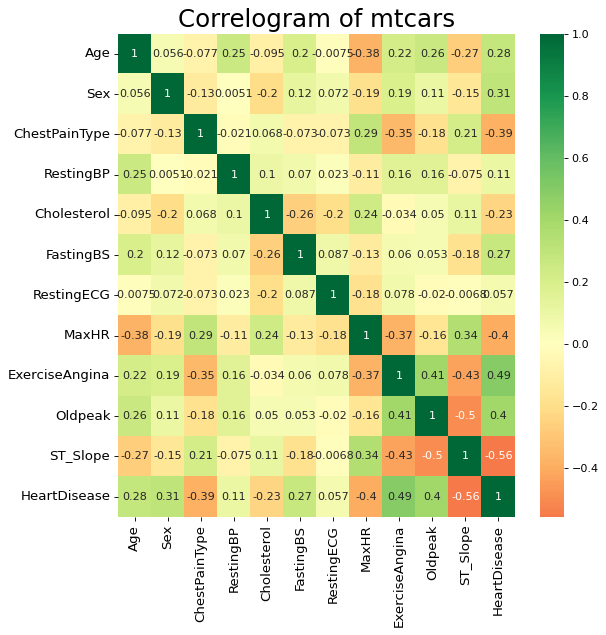

In [20]:

plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This analysis shows the correlation values between different features. In layman terms, a good positive correlation value (close to 1) suggests that on increasing 1 feature/column the other will also increase similarly, a negative correlation suggests inverse relation. For our study, last row is very important as it tells us how different features affect **probability of Heart Disease**

No handles with labels found to put in legend.


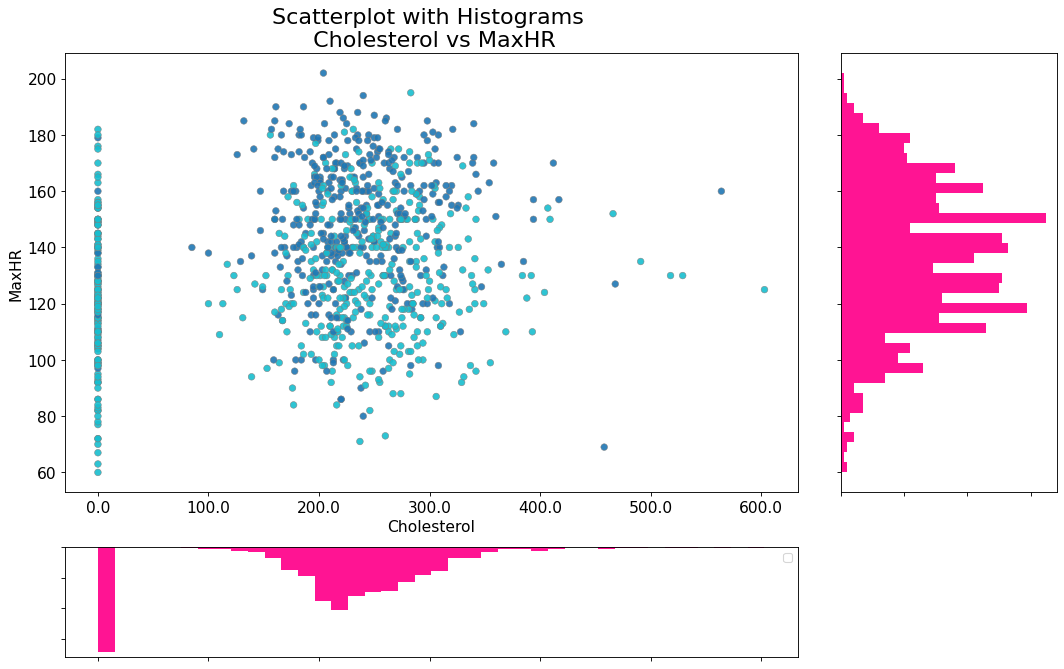

In [21]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('Cholesterol', 'MaxHR', c=df.HeartDisease.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5, label=df['HeartDisease'])

# histogram on the right
ax_bottom.hist(df.Cholesterol, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.MaxHR, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Cholesterol vs MaxHR', xlabel='Cholesterol', ylabel='MaxHR')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.legend()
plt.show()

This plot shows the relation between Cholestrol and Max. Heart Rate for the two classes (disease and no-disease) through the scatter plot. And their respective distributions through the histogram.

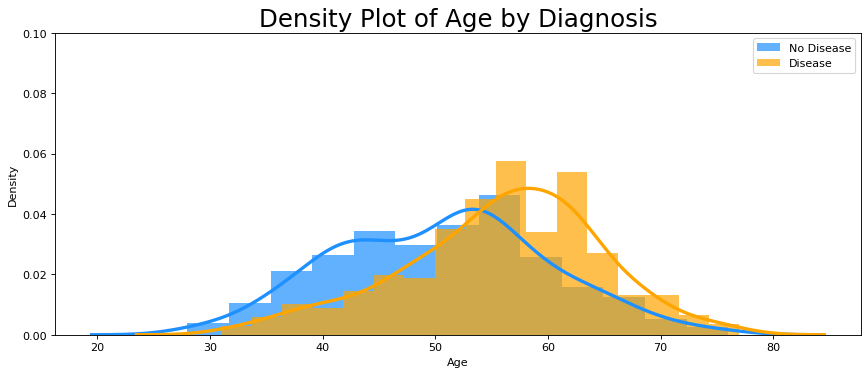

In [22]:
plt.figure(figsize=(13,5), dpi= 80)
sns.distplot(df.loc[df['HeartDisease'] == 0, "Age"], color="dodgerblue", label="No Disease", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['HeartDisease'] == 1, "Age"], color="orange", label="Disease", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.1)

# Decoration
plt.title('Density Plot of Age by Diagnosis', fontsize=22)
plt.legend()
plt.show()

This plot shows the analaysis of 'Age' column of the dataset ans shows it's density distribution for the two classes.

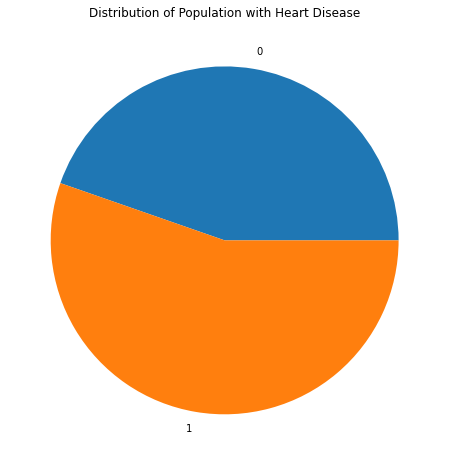

In [23]:
df_n = df.groupby('HeartDisease').size()

# Make the plot with pandas
df_n.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Distribution of Population with Heart Disease")
plt.ylabel("")
plt.show()

This pie-chart was made to check the **skewness of the dataset**. It shows that the dataset roughly contains equal number of positive and negative samples and is suitable for ML training.

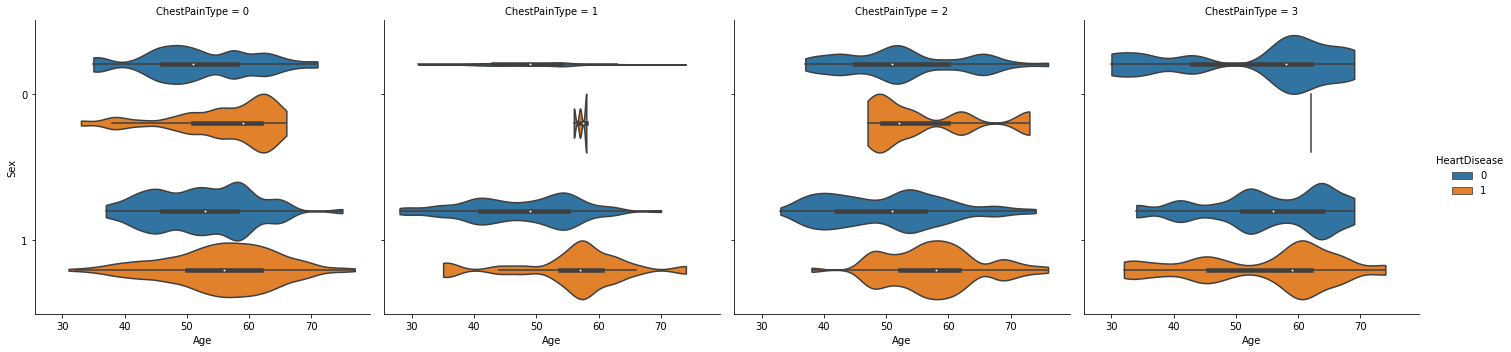

In [24]:
sns.catplot(x="Age", y="Sex",
            hue="HeartDisease", col="ChestPainType",
            data=df[df.Sex.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

Above is a **violin plot** to check the distribution of positive and negative samples across different 'Sex', 'ChestPain' and 'Age'. The higher width/amplitude of violin suggests more number of samples at that particular parameters.

     |████████████████████████████████| 565 kB 4.2 MB/s 


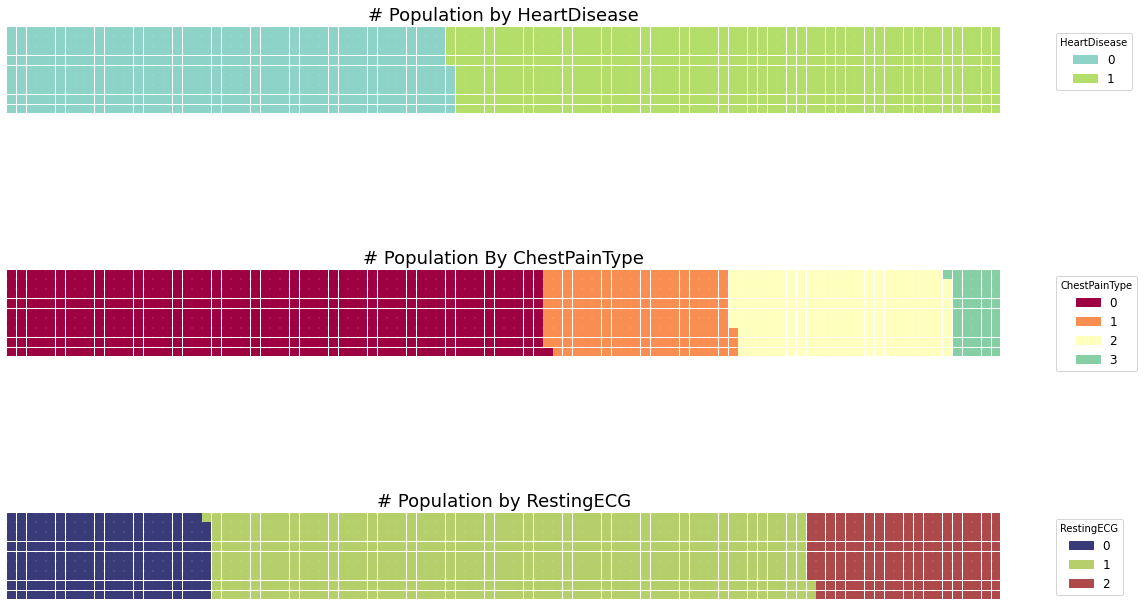

In [25]:
!pip install pywaffle
from pywaffle import Waffle



df_class = df.groupby('HeartDisease').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

df_cyl = df.groupby('ChestPainType').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

df_make = df.groupby('RestingECG').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['HeartDisease', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'HeartDisease'},
            'title': {'label': '# Population by HeartDisease', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['ChestPainType', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'ChestPainType'},
            'title': {'label': '# Population By ChestPainType', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['RestingECG', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'RestingECG'},
            'title': {'label': '# Population by RestingECG', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)

Above is a **waffle chart** and shows the distribution of population in terms of categorical variables: 
1. HeartDisease 
2. ChestPainType and 
3. RestingECG

## Standardisation of continuous attributes using StandardScaler()

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
continuous_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for col in continuous_cols:
    df[col] = StandardScaler().fit_transform(df[[col]])

# Splitting into Testing and Training Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3,stratify=y, random_state=42)


# Training the Model and Cross Validation

In [30]:
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

In [31]:
models = [MLPClassifier(),XGBClassifier(),RandomForestClassifier(),KNeighborsClassifier(),lgb.LGBMClassifier()]

In [32]:
# evaluate model performance by K-Fold Cross validation
from sklearn.model_selection import cross_val_score
score=[]
cl=[]
for clf in models:
    scores = cross_val_score(clf,X,y,cv=5)
    print(clf.__class__.__name__,":",scores,"Avg=",scores.mean())
    cl.append(clf.__class__.__name__)
    score.append(scores.mean())
cv=[]
for i in range(len(cl)):
  cv.append([cl[i],score[i]])
cv= pd.DataFrame(cv)
cv.columns=['Model','CV Score']
cv
    

MLPClassifier : [0.83152174 0.875      0.8423913  0.83060109 0.74863388] Avg= 0.8256296032311713
XGBClassifier : [0.86956522 0.85326087 0.82065217 0.81420765 0.76502732] Avg= 0.8245426467094322
RandomForestClassifier : [0.88586957 0.83695652 0.82608696 0.83606557 0.73770492] Avg= 0.8245367070563079
KNeighborsClassifier : [0.80434783 0.89130435 0.83152174 0.83060109 0.75409836] Avg= 0.8223746733190783
LGBMClassifier : [0.82608696 0.875      0.82065217 0.83060109 0.72677596] Avg= 0.8158232359230221


,Model,CV Score
0,MLPClassifier,0.825630
1,XGBClassifier,0.824543
2,RandomForestClassifier,0.824537
3,KNeighborsClassifier,0.822375
4,LGBMClassifier,0.815823


(0.65, 0.832)

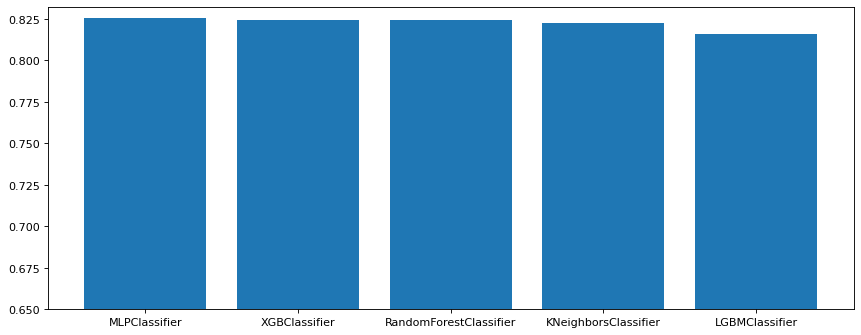

In [33]:
plt.figure(figsize=(13,5), dpi= 80)
plt.bar(cv['Model'],cv['CV Score'])
plt.ylim(0.65,0.832)

Based on the cross validation we conclude that **Multi Layer Perceptron** is the best performing model

## **Sequential Feature Selection** 

In [34]:
import joblib
import sys
import pandas as pd
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
clf= MLPClassifier()
model = SFS(clf, k_features=7, forward=True, floating=False, scoring = 'accuracy')
model = model.fit(X, y)
ind= list(model.k_feature_names_)

In [36]:
print(ind)

['Sex', 'ChestPainType', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [37]:
ind=['Age', 'Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

We picked the 7 top most features using Sequential Feature Selection,  the usage of this step is two-fold:
1. **Improve the Accuracy of the Model**
2. **Reduce the number of Required user input** 

We have also kept in mind the second point while deploying our engine on website and kept certain default values for parameters which are not usually known to the user. These values have been chosen from the data analysis done above.

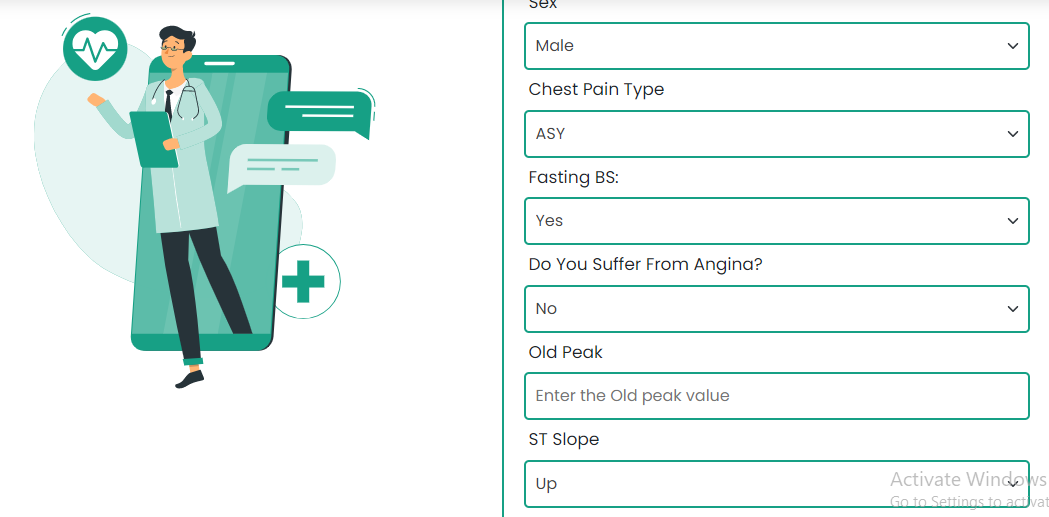

In [38]:
data=[]
for i in ind:
  data.append(df[i])
data= np.transpose(data)
df1= pd.DataFrame(data)
df1.columns= ind
df1

,Age,Sex,ChestPainType,FastingBS,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1.0,1.0,0.0,0.0,-0.832432,1.0
1,-0.478484,0.0,2.0,0.0,0.0,0.105664,0.0
2,-1.751359,1.0,1.0,0.0,0.0,-0.832432,1.0
3,-0.584556,0.0,0.0,0.0,1.0,0.574711,0.0
4,0.051881,1.0,2.0,0.0,0.0,-0.832432,1.0
...,...,...,...,...,...,...,...
913,-0.902775,1.0,3.0,0.0,0.0,0.293283,0.0
914,1.536902,1.0,0.0,1.0,0.0,2.357094,0.0
915,0.370100,1.0,0.0,0.0,1.0,0.293283,0.0
916,0.370100,0.0,1.0,0.0,0.0,-0.832432,0.0


In [39]:
clf= MLPClassifier()
X1= df1.to_numpy()
scores = cross_val_score(clf,X1,y,cv=5)
print(clf.__class__.__name__,":",scores,"Avg=",scores.mean())

MLPClassifier : [0.89130435 0.88043478 0.84782609 0.84153005 0.77595628] Avg= 0.8474103112378237


## **Random Search CV**

To get the best set of hyper-parameters for our best performing classifier i.e. MLP

In [40]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}

In [41]:
clf = RandomizedSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(X1, y)
print(clf.score(X1, y))
print(clf.best_params_)

0.9041394335511983
{'solver': 'lbfgs', 'random_state': 2, 'max_iter': 1600, 'hidden_layer_sizes': 13, 'alpha': 0.0001}


## **Model Performance analysis**

### 1. ROC-AUC Curve

In [42]:
from sklearn.metrics import roc_curve
X_train,X_test,y_train,y_test= train_test_split(X1,y,test_size=0.2)

Text(0.5, 1.0, 'ROC Curve')

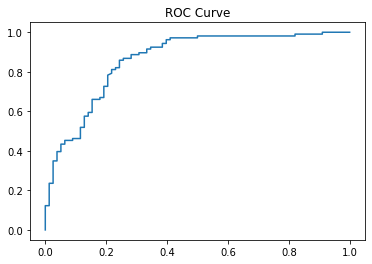

In [43]:
clf.fit(X_train,y_train)
pred_prob1 = clf.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
plt.plot(fpr1,tpr1)
plt.title('ROC Curve')

In [44]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.8616956942428641


### 2. Confusion Matrix

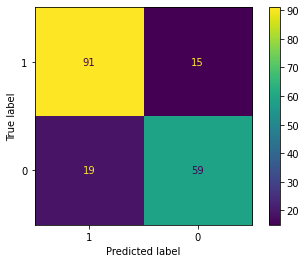

In [52]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred= clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred,labels=y_test.unique())
ConfusionMatrixDisplay(cm,display_labels=y_test.unique()).plot()

### 3. Precision= TP/TP+FP

In [46]:
pr= cm[1][1]/(cm[1][1]+cm[0][1])
pr

0.8272727272727273

### 4. Recall= TP/(TP+FN)

In [47]:
re= cm[1][1]/(cm[1][1]+cm[1][0])
re

0.8584905660377359

### 5. F1-Score

In [48]:
f1= 2/((1/pr)+(1/re))
f1

0.8425925925925928

### 6. Accuracy

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8152173913043478
